### EV353 Oceanography and Climate In-class Data Analysis Activity

**Global sea surface height $\eta$**

Sea surface height ($\eta$) is a key oceanographic variable measured with satellites that is conventiently proportional to pressure.  For this activity, you will work with the AVISO sea surface height product. The low-resolution dataset that you will use here is globally gridded at 1° horizontal resolution from 1993-2010.

The dataset `aviso_lowres.nc` is needed for this activity.  

----
**1. Open and display the mixed layer depth dataset using xarray (sample code provided below for you to modify)**

```
# open dataset using xarray (aviso_lowres.nc)
filePath = 'paste your filepath here'
ds = xr.open_dataset(filePath)

# display dataset
ds
```

**2. Then generate a global map of the time-averaged sea surface height field** 

**3. Once you generate your map, interpret the results!**
- Examine the time-averaged sea surface height field
- Broadly, where in the world ocean is ($\eta$) relatively high and relatively low?
- Where are there particularly strong horizontal gradients of ($\eta$)?

**4. Plot a few profiles of ($\eta$) along various lines of latitude**
- Are zonal ($\eta$) gradients stronger along the equator or in the midlatitudes (~30°N/S)

Add your observations in a Markdown cell and discuss them with your classmates.

In [1]:
# import Python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Text(0.5, 1.0, 'Averages Sea-Surface Height')

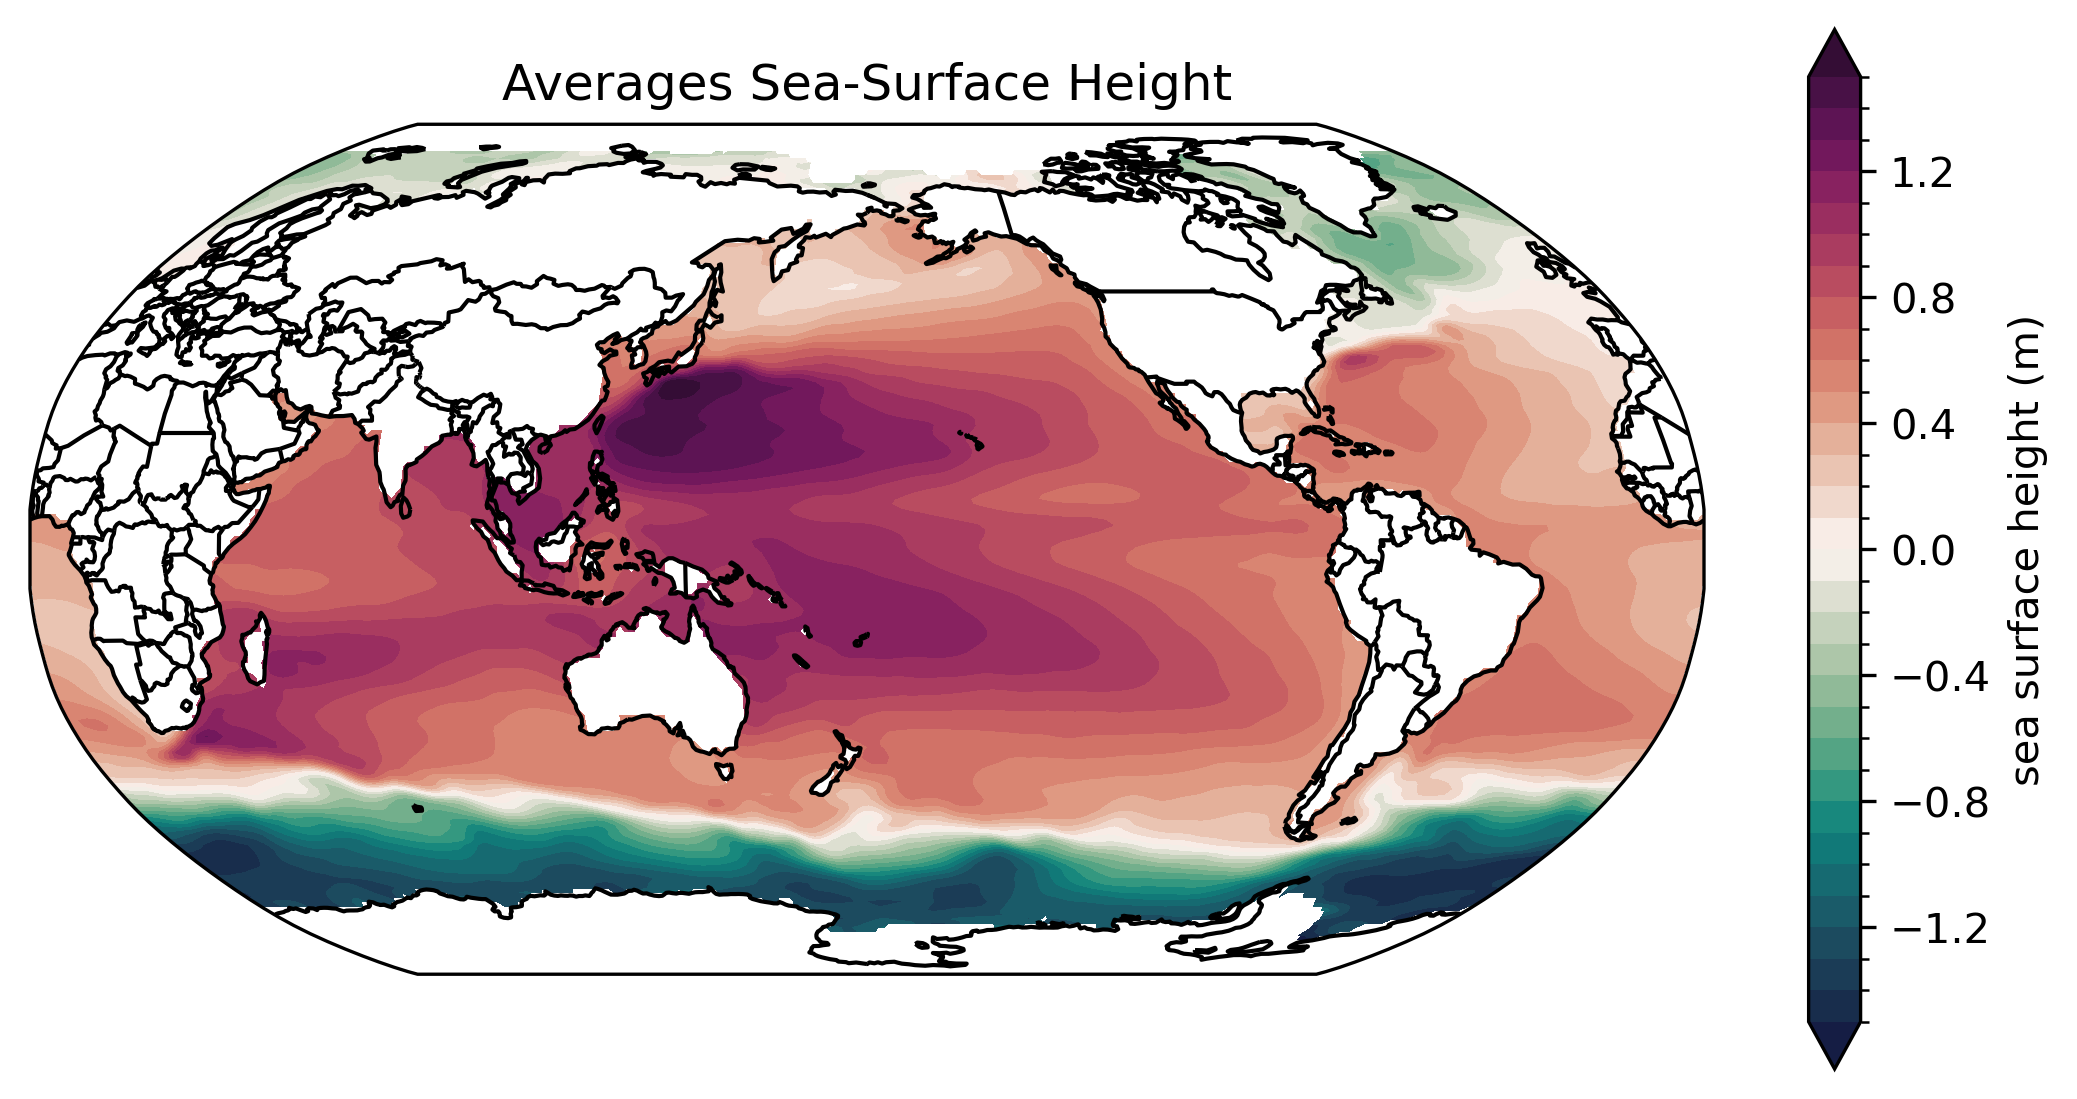

In [51]:
# open dataset using xarray (aviso_lowres.nc)
filePath = '/Users/a_rust/Documents/EV353_Oceanography/aviso_lowres.nc'
ds = xr.open_dataset(filePath)

# display dataset
ds

ssh = ds['ssh'].mean(dim='time')

#plot

proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.curl
lev = np.arange(-1.5, 1.6, 0.1)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# 
ssh.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "sea surface height (m)"}
    
 
)
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 

# add title
ax.set_title("Averages Sea-Surface Height")


Once you generate your map, interpret the results!

1. Examine the time-averaged sea surface height field
3. Broadly, where in the world ocean is () relatively high and relatively low?
SSH is generally high at the mid/low latitudes and low at the poles. It's also higher where we know SST are generally higher in the Western Pacific and lower in the Pacific cold tongue. Also, where we know there are strong western boundary currents there is higher ssh.
5. Where are there particularly strong horizontal gradients of ()?
Over the Pacific basin, going from west to east pressure decreases. Additionally, from the poles to the equator there is an increase in SSH.

In [14]:
ds

<xarray.Dataset>
Dimensions:   (time: 216, lat: 180, lon: 360)
Coordinates:
  * time      (time) float64 1.993e+03 1.993e+03 ... 2.011e+03 2.011e+03
  * lat       (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    ssh       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    gOverF    (lat, lon) float32 ...
    lat_grid  (lat, lon) float32 ...
Attributes:
    description:  Aviso

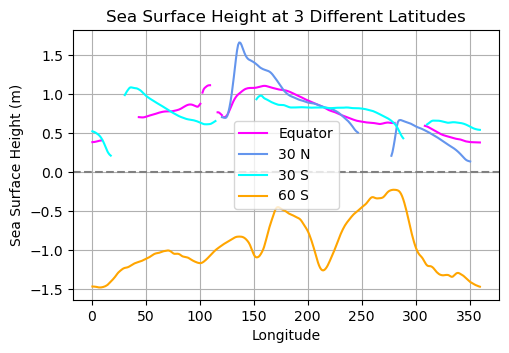

In [54]:
ssh_lat1 = ds.ssh.sel(lat=0, method='nearest').mean(dim='time')
ssh_lat2 = ds.ssh.sel(lat=30, method='nearest').mean(dim='time')
ssh_lat3 = ds.ssh.sel(lat=-30, method='nearest').mean(dim='time')
ssh_lat4 = ds.ssh.sel(lat=-60, method='nearest').mean(dim='time')

# Plot
plt.figure(figsize=(5.5, 3.5))
plt.plot(ssh['lon'], ssh_lat1, color='magenta', label='Equator')
plt.plot(ssh['lon'], ssh_lat2, color= 'cornflowerblue', label='30 N')
plt.plot(ssh['lon'], ssh_lat3, color='cyan', label='30 S')
plt.plot(ssh['lon'], ssh_lat4, color='orange', label='60 S')

plt.title('Sea Surface Height at 3 Different Latitudes')
plt.xlabel('Longitude')
plt.ylabel('Sea Surface Height (m)')
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='gray', linestyle='--')

plt.savefig('ssh_profiles.png', dpi=300, bbox_inches='tight')

plt.show()

Q. Are zonal ($\eta$) gradients stronger along the equator or in the midlatitudes (~30°N/S)
A. Zonal ($\eta$) gradients are stronger along the midlatitudes. The equator stays generally constant as longitude increases, however, 30N and 30S fluctuate. 30N has the highest ($\eta$) gradient our of the three I latitudes I have plotted. For instance, from ~140 to ~240 the ssh drops from 1.6m to 0.5m. However, the greatest ($\eta$) gradient along the equator, from ~160 to ~250, the drop is 1.1m to 0.65m. The reason for this difference could be due to the higher wind speeds that occur at the midlatitudes compared to the equator, or the more slightly more unequal heating of these latitudes due to seasonality. 